<a href="https://colab.research.google.com/github/Visionary-DataWorks/DSPL-Project/blob/main/KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#load cleaned Data set
file_path ="/content/cleaned_train_data.csv"
df_cleaned = pd.read_csv(file_path)

In [3]:
print(df_cleaned.head())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_category  city_encoded  
0                 4            11  
1                 1            13  
2                 4            19  
3                 4            19  
4                 4            11  


In [4]:
#Checking missing values
print(df_cleaned.info())
print(df_cleaned.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774148 entries, 0 to 774147
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774146 non-null  float64
 1   outlet_city       774148 non-null  object 
 2   luxury_sales      774148 non-null  float64
 3   fresh_sales       774148 non-null  float64
 4   dry_sales         774148 non-null  float64
 5   cluster_category  774148 non-null  int64  
 6   city_encoded      774148 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 41.3+ MB
None
<bound method DataFrame.sum of         Customer_ID  outlet_city  luxury_sales  fresh_sales  dry_sales  \
0             False        False         False        False      False   
1             False        False         False        False      False   
2             False        False         False        False      False   
3             False        False         False        False    

#check chek

define X and Y

In [5]:
#Define Features (X)and Target (Y)
x = df_cleaned.drop(columns=['cluster_category','outlet_city'])#features
y = df_cleaned['cluster_category'] #Target variable
print("Features shape:", x.shape)
print("Target shape:", y.shape)


Features shape: (774148, 5)
Target shape: (774148,)


Split data into Train and Test

In [6]:
from sklearn.model_selection import train_test_split

#splitting data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 42, stratify= y)

print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)


Training set size: (619318, 5)
Testing set size: (154830, 5)


In [7]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

Feature Scaling

In [8]:
from sklearn. preprocessing import StandardScaler

#initialize scaler()
scaler = StandardScaler()

#fit &transform training data, transform testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Train KNN Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

#initialize the Knn model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

#tain model
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier()

Model Evaluation

In [10]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

#predict on test set
y_predict= knn.predict(x_test_scaled)

#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))

Accuracy: 0.999638312988439
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     37797
           2       1.00      1.00      1.00     31013
           3       1.00      1.00      1.00      9781
           4       1.00      1.00      1.00     34488
           5       1.00      1.00      1.00      7908
           6       1.00      1.00      1.00     33843

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830

Confusion Matrix:
 [[37791     1     2     2     0     1]
 [    0 31010     1     1     0     1]
 [    1     0  9774     1     5     0]
 [    2     0     2 34481     3     0]
 [    2     0    18     2  7885     1]
 [    0     2     5     2     1 33833]]


Optimize K

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

#range of k values
k_values = range(1,21)
accuracy_scores = []

#Iterate over k values
for k in k_values:
  print(f"Trainning KNN with k={k}...")
  knn = KNeighborsClassifier(n_neighbors = k) # initialize KNN Model
  knn.fit(x_train_scaled, y_train)  # Train model
  y_predict = knn.predict(x_test_scaled) #Predict on test data
  accuracy = accuracy_score(y_test, y_predict)  # compute accuracy
  accuracy_scores.append(accuracy)
  print(f"Completed k={k}, Accuracy={accuracy:.4f}")

Trainning KNN with k=1...
Completed k=1, Accuracy=0.9996
Trainning KNN with k=2...
Completed k=2, Accuracy=0.9995
Trainning KNN with k=3...
Completed k=3, Accuracy=0.9997
Trainning KNN with k=4...
Completed k=4, Accuracy=0.9996
Trainning KNN with k=5...
Completed k=5, Accuracy=0.9996
Trainning KNN with k=6...
Completed k=6, Accuracy=0.9996
Trainning KNN with k=7...
Completed k=7, Accuracy=0.9996
Trainning KNN with k=8...
Completed k=8, Accuracy=0.9996
Trainning KNN with k=9...
Completed k=9, Accuracy=0.9995
Trainning KNN with k=10...
Completed k=10, Accuracy=0.9995
Trainning KNN with k=11...
Completed k=11, Accuracy=0.9995
Trainning KNN with k=12...
Completed k=12, Accuracy=0.9994
Trainning KNN with k=13...
Completed k=13, Accuracy=0.9994
Trainning KNN with k=14...
Completed k=14, Accuracy=0.9994
Trainning KNN with k=15...
Completed k=15, Accuracy=0.9994
Trainning KNN with k=16...
Completed k=16, Accuracy=0.9993
Trainning KNN with k=17...
Completed k=17, Accuracy=0.9993
Trainning KNN w

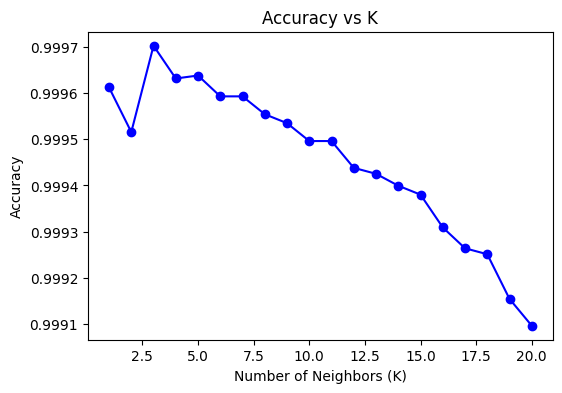

In [21]:
#plot accuracy
plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy_scores, marker='o',color = 'blue')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()